# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["weather"][0]["description"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | tinajo
Processing Record 3 of Set 1 | kolonia town
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | leer
Processing Record 10 of Set 1 | antsohimbondrona
City not found. Skipping...
Processing Record 11 of Set 1 | rexburg
Processing Record 12 of Set 1 | ust'-kulom
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | maymana
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | sao gabriel da cachoeira
Processing Record 18 of Set 1 | angatuba
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,67.06,96,100,9.06,BR,overcast clouds
1,tinajo,29.0788,-13.7081,70.68,78,20,5.75,ES,few clouds
2,kolonia town,6.9640,158.2060,86.00,74,75,5.75,FM,light rain
3,hamilton,39.1834,-84.5333,46.06,81,75,9.22,US,broken clouds
4,edinburgh of the seven seas,-37.0676,-12.3116,55.06,90,92,29.97,SH,light rain


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,67.06,96,100,9.06,BR,overcast clouds
1,tinajo,29.0788,-13.7081,70.68,78,20,5.75,ES,few clouds
2,kolonia town,6.9640,158.2060,86.00,74,75,5.75,FM,light rain
3,hamilton,39.1834,-84.5333,46.06,81,75,9.22,US,broken clouds
4,edinburgh of the seven seas,-37.0676,-12.3116,55.06,90,92,29.97,SH,light rain


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

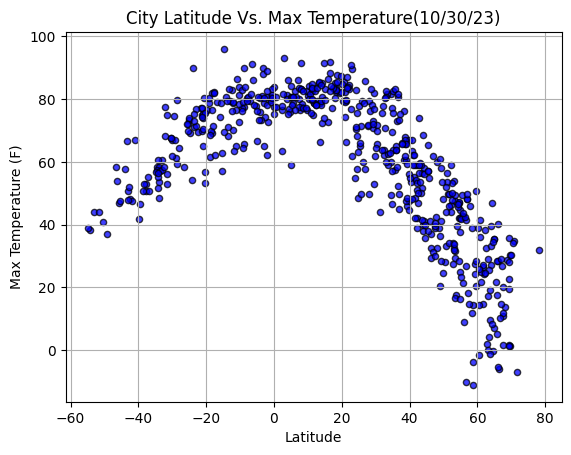

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

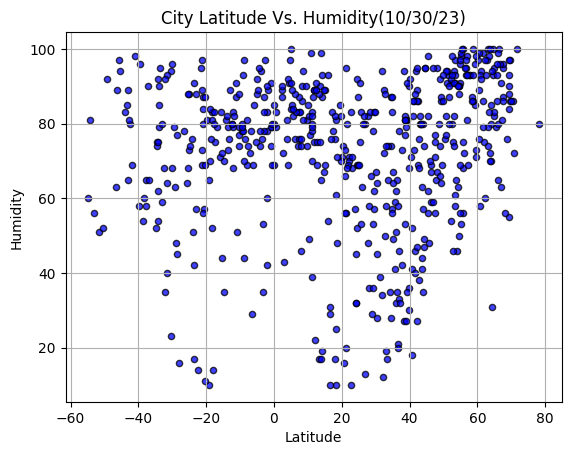

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

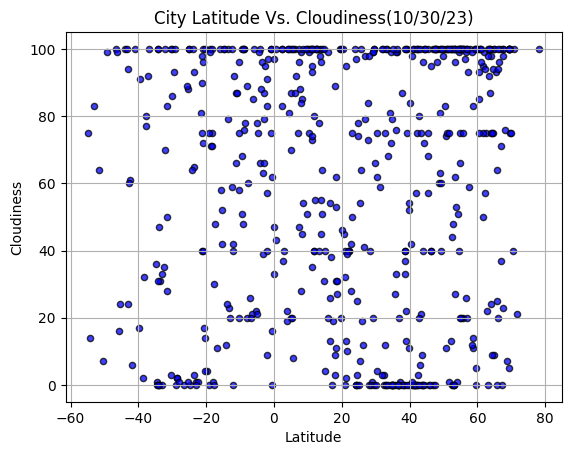

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

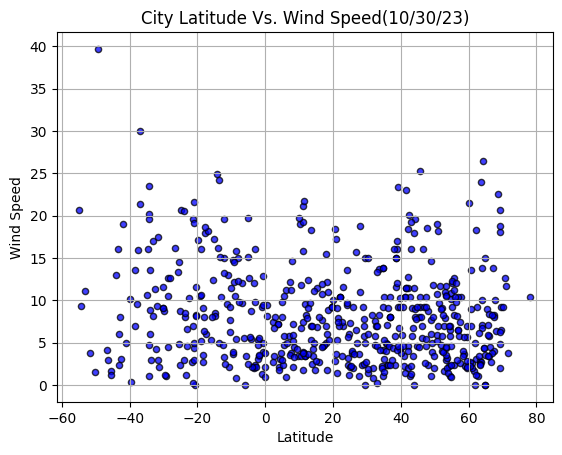

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tinajo,29.0788,-13.7081,70.68,78,20,5.75,ES,few clouds
2,kolonia town,6.9640,158.2060,86.00,74,75,5.75,FM,light rain
3,hamilton,39.1834,-84.5333,46.06,81,75,9.22,US,broken clouds
5,jamestown,42.0970,-79.2353,42.03,89,100,18.41,US,overcast clouds
6,yellowknife,62.4560,-114.3525,32.41,93,75,9.22,CA,broken clouds


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,67.06,96,100,9.06,BR,overcast clouds
4,edinburgh of the seven seas,-37.0676,-12.3116,55.06,90,92,29.97,SH,light rain
7,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,few clouds
11,ushuaia,-54.8000,-68.3000,38.86,60,75,20.71,AR,broken clouds
14,sao gabriel da cachoeira,-0.1303,-67.0892,83.91,69,97,2.08,BR,overcast clouds


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8667437072643129


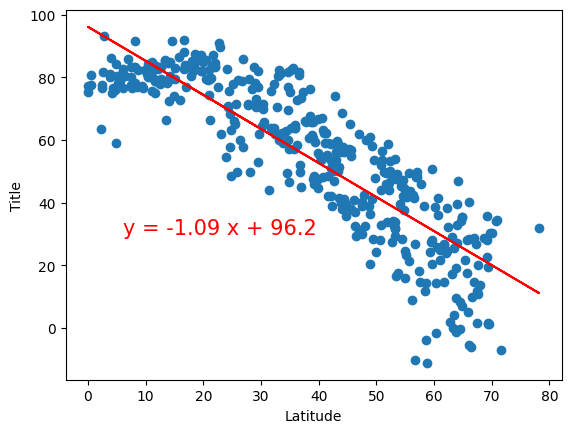

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8027294182774103


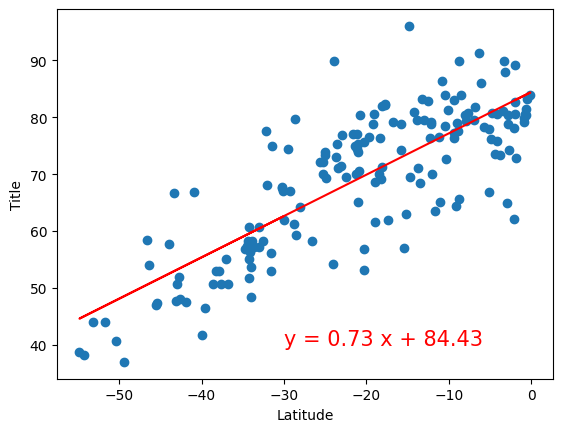

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21215445751661796


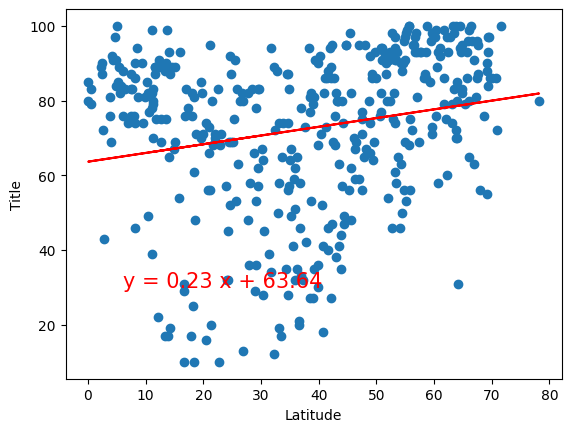

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (6,30))

The r-squared is: 0.08049386653263242


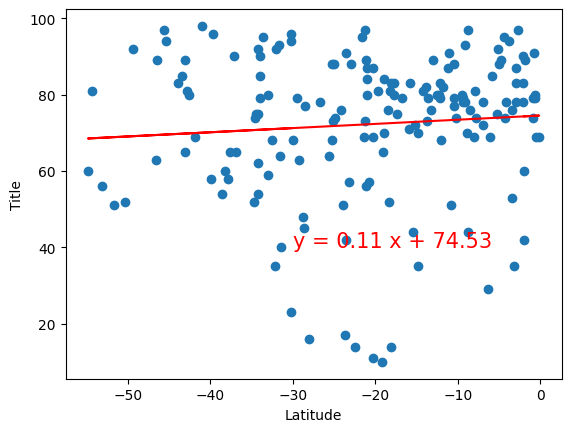

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0793870413964952


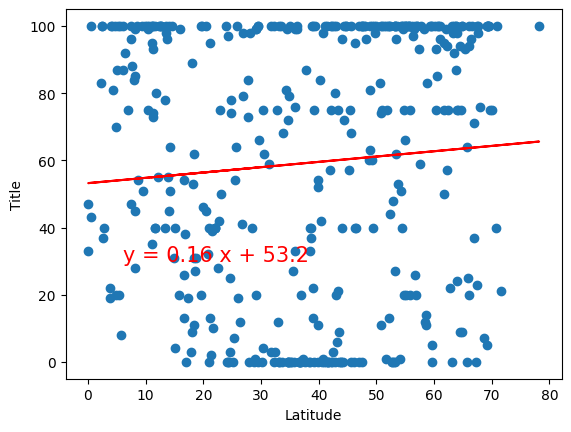

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (6,30))

The r-squared is: 0.12205945815651822


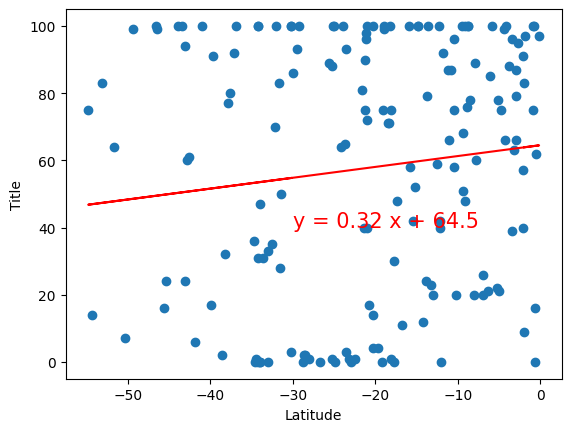

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.038921602948600725


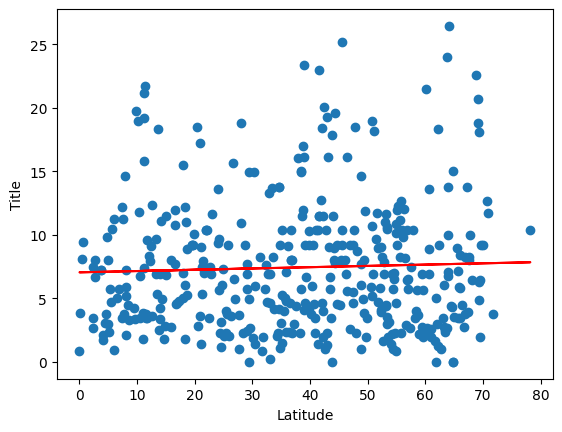

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (6,30))

The r-squared is: -0.1414133206242345


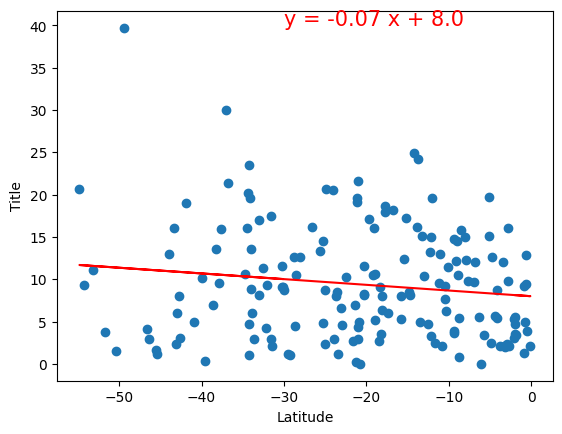

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE